<a href="https://colab.research.google.com/github/Suvam7407/GitHub-Projects/blob/master/LinearRegression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  linearRegression
  

In [0]:
# Supervised Learning
# Linear Regression
# Student Test Grade Prediction
# Knowledge Discovery Process [KDD]

# Stage 1 : Load Dataset
import pandas as pd
df = pd.read_csv('http://devanshushukla.com/hackveda.in/videos/Grade_Set_1.csv')
df

,Hours_Studied,Test_Grade,Status,Result
0,2,57,fail,D
1,3,66,fail,D
2,4,73,pass,C
3,5,76,pass,C
4,6,79,pass,C
5,7,81,pass,B
6,8,90,pass,B
7,9,96,pass,A
8,10,100,pass,A


In [0]:
# Data Exploration
# check column names
df.columns

Index(['Hours_Studied', 'Test_Grade', 'Status', 'Result'], dtype='object')

In [0]:
# check Dimensions
df.shape  # (rows , column)

(9, 4)

In [0]:
# info() --> statistical summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
Hours_Studied    9 non-null int64
Test_Grade       9 non-null int64
Status           9 non-null object
Result           9 non-null object
dtypes: int64(2), object(2)
memory usage: 416.0+ bytes


In [0]:
# check for missing values
df.isna().any()

Hours_Studied    False
Test_Grade       False
Status           False
Result           False
dtype: bool

,Hours_Studied,Test_Grade,Status
Hours_Studied,1.000000,0.987797,0.724569
Test_Grade,0.987797,1.000000,0.745054
Status,0.724569,0.745054,1.000000


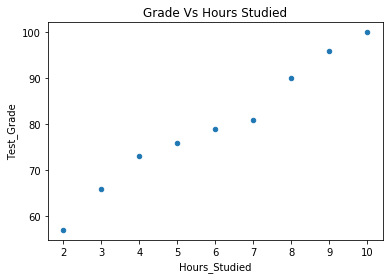

In [0]:
# Stage 2 : Selection
# Independent Variable
# Dependent Variable

'''
How do we select Independent / Dependent Variable ?

Independent variables are characteristics that can be measured directly 
(example the Hours_Studied).

Dependent variable is a characteristic whose value depends on the values of
independent variables (example the Test_Grade).

'''

import matplotlib.pyplot as plt
%matplotlib inline

df.plot(kind='scatter' , x='Hours_Studied' , y='Test_Grade',
        title='Grade Vs Hours Studied')

df.corr()

In [0]:
# Stage 3 : Preprocessing
# isnull() --> it will return TRUE if there is any missing value
df.isnull()

,Hours_Studied,Test_Grade,Status,Result
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False


In [0]:
# Stage 4 : Transformation

# Label Binarizer --> It Converts boolean categorical values like yes/no  true/false
# fail/pass  success/noSuccess into numerical features [0/1]

import sklearn.preprocessing as pp
lb = pp.LabelBinarizer()
print ('Before Conversion\n',df)

Before Conversion
    Hours_Studied  Test_Grade Status Result
0              2          57   fail      D
1              3          66   fail      D
2              4          73   pass      C
3              5          76   pass      C
4              6          79   pass      C
5              7          81   pass      B
6              8          90   pass      B
7              9          96   pass      A
8             10         100   pass      A


In [0]:
df.Status = lb.fit_transform(df.Status)
print ('After Conversion\n',df)

After Conversion
    Hours_Studied  Test_Grade  Status Result
0              2          57       0      D
1              3          66       0      D
2              4          73       1      C
3              5          76       1      C
4              6          79       1      C
5              7          81       1      B
6              8          90       1      B
7              9          96       1      A
8             10         100       1      A


In [0]:
# Normalization / MIN - MAX Scaling
# Changing the scale of multiple variables to a same range (0-1)
# Xnorm = (X - Xmin) / (Xmax - Xmin)

# Dependent Variable
Y = df.Test_Grade.values
Y

array([ 57,  66,  73,  76,  79,  81,  90,  96, 100])

In [0]:
# Independent Variable 
import numpy as np
X = df.Hours_Studied.values[:,np.newaxis]
X

array([[ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [0]:
Xmin = X.min()
print ('Xmin :',Xmin)
Xmax = X.max()
print ('Xmax :',Xmax)
Xnorm = (X-Xmin) / (Xmax - Xmin)
Xnorm

Xmin : 2
Xmax : 10


array([[0.   ],
       [0.125],
       [0.25 ],
       [0.375],
       [0.5  ],
       [0.625],
       [0.75 ],
       [0.875],
       [1.   ]])

In [0]:
Ynorm = (Y - Y.min()) / (Y.max() - Y.min())
Ynorm

array([0.        , 0.20930233, 0.37209302, 0.44186047, 0.51162791,
       0.55813953, 0.76744186, 0.90697674, 1.        ])

In [0]:
# Stage 5 : Data Mining
# Identification an equation which can predict Test_Grade on the basis on Hours_Studied
# Linear Regression : Y = a + bX
'''A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable 
and Y is the dependent variable.
The slope of the line is b, and a is the intercept (the value of y when x = 0).

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
'''
import sklearn.linear_model as lm
# classifier object
lr = lm.LinearRegression()

# Train Our Model
# Fitting Of a Linear Regression Model

lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Predict the values of marks on the basis of hours
hrs = int(input('Enter Study Hours : '))
marks = lr.predict([[hrs]])
print ('Student who studies for',hrs,' hrs will going to score',marks,'marks')

Enter Study Hours : 10
Student who studies for 10  hrs will going to score [99.84444444] marks


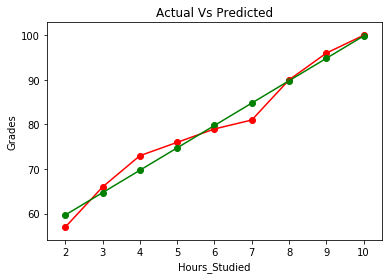

In [0]:
# Plot --> Actual Vs Predicted
plt.plot(X,Y,color='red')
plt.scatter(X,Y,color='red')
plt.xlabel('Hours_Studied')
plt.ylabel('Grades')
plt.title('Actual Vs Predicted')
# Plot The Predicted values
plt.plot(X,lr.predict(X),color='green')
plt.scatter(X,lr.predict(X),color='green')

In [0]:
df['predicted_Values'] = lr.predict(X)
df

,Hours_Studied,Test_Grade,Status,Result,predicted_Values
0,2,57,0,D,59.711111
1,3,66,0,D,64.727778
2,4,73,1,C,69.744444
3,5,76,1,C,74.761111
4,6,79,1,C,79.777778
5,7,81,1,B,84.794444
6,8,90,1,B,89.811111
7,9,96,1,A,94.827778
8,10,100,1,A,99.844444


In [0]:
# Evaluate Our Model Performance
# Accuracy --> r2_score [regression score function][0-1]
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
#error score=min the error better the model
#mean absolute error
#root mean squared error
 
from sklearn.metrics import r2_score
accuracy = r2_score(Y,lr.predict(X))
print ('Accuracy Of Model is :',accuracy)
#error:0-n
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(Y,lr.predict(X))
print("mean absolute error",mae)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,lr.predict(X))
print("mean squared error",mse)
print("root mean squared error",(mse)**1/2)

Accuracy Of Model is : 0.9757431074095347
mean absolute error 1.618518518518523
mean squared error 4.170987654320986
root mean squared error 2.085493827160493
